### Singular Value Decomposition in Python

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

we’ll attempt to classify handwritten digits. Fortunately, the scikit-learn library provides a wrapper function for importing the dataset into our program.

In [2]:
X, y = load_digits(return_X_y=True)

The dataset contains 1797 8x8 images. If you specify return_X_y=True the function will return the pixels as a one dimensional array.

In [3]:
X.shape

(1797, 64)

y contains the labels for every digit.

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

Let’s take a look at the first digit. As we can see, it’s simply an array of length 64 containing the pixel intensities.

In [6]:
image = X[0]
image

array([0.00, 0.00, 5.00, 13.00, 9.00, 1.00, 0.00, 0.00, 0.00, 0.00, 13.00,
       15.00, 10.00, 15.00, 5.00, 0.00, 0.00, 3.00, 15.00, 2.00, 0.00,
       11.00, 8.00, 0.00, 0.00, 4.00, 12.00, 0.00, 0.00, 8.00, 8.00, 0.00,
       0.00, 5.00, 8.00, 0.00, 0.00, 9.00, 8.00, 0.00, 0.00, 4.00, 11.00,
       0.00, 1.00, 12.00, 7.00, 0.00, 0.00, 2.00, 14.00, 5.00, 10.00,
       12.00, 0.00, 0.00, 0.00, 0.00, 6.00, 13.00, 10.00, 0.00, 0.00,
       0.00])

If we want to view the image using matplotlib, we must first reshape the array.

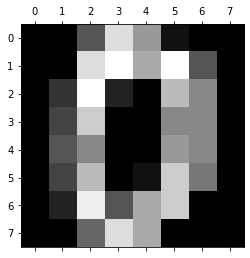

In [7]:
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

* we’ll use **Singular Value Decomposition** to see whether we are able to reconstruct the image using only 2 features for each row. 
* The s matrix returned by the function must be converted into a diagonal matrix using the diag method. By default, diag will create a matrix that is n x n, relative to the original matrix. 
* This causes a problem as the size of the matrices no longer follow the rule of matrix multiplication where the number of columns in a matrix must match the number of rows in the other matrix.
* Therefore, we create a new m x n matrix and populate the first n x n part of it with the diagonal matrix.

In [9]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
VT = V[:n_component, :]
A = U.dot(Sigma.dot(VT))
print(A)

NameError: name 'Sigma' is not defined

* We can get the reduced feature space by taking the dot product of the U and S matrices.

In [10]:
U.dot(S)

array([[10.97, -12.23],
       [26.04, -6.82],
       [18.73, 7.95],
       [14.60, 8.08],
       [12.72, 7.84],
       [16.19, 8.21],
       [20.45, -2.05],
       [11.36, -12.85]])

###  Original vs Reduced Feature Space

~ Let’s compare the accuracy of a Random Forest model when it’s trained using the original handwritten digits and when it’s trained using the reduced feature space obtained from Singular Value Decomposition.
* We can gauge the accuracy of the model by taking a look at the Out-Of-Bag score. 

In [11]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y)
rf_original.oob_score_

0.9760712298274903

* we create and fit an instance of the TruncatedSVD class with 2 components. 
* It’s worth mentioning that unlike the previous example, we’re using 2/64 features.

In [12]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

* Every image (i.e. row) in the reduced dataset contains 2 features.

In [13]:
X_reduced[0]


array([45.86, -1.19])

* #: Taking a look at the image, it’s difficult to distinguish what digit the image consists of, it could very well be a 5 and not a 0.

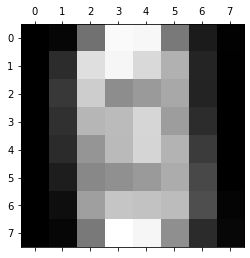

In [14]:
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')

After training a Random Forest Classifier on the reduced dataset, we obtain a meager accuracy of 36.7%

In [15]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.39454646633277685

* We can get the total variance explained by taking the sum of the explained_variance_ratio_ property. 
* We generally want to aim for 80 to 90 percent.

In [16]:
svd.explained_variance_ratio_.sum()

0.17760900858290962

* Let’s try again, only, this time, we use 16 components. We check to see the amount of information contained in the 16 features.

In [22]:
svd = TruncatedSVD(n_components=20)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.8940620870971735

* We obtain an accuracy comparable to the model trained using the original images and we used 16/64=0.25 the amount of data.

In [23]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9677239844184753

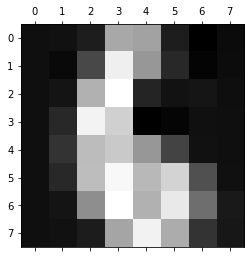

In [25]:
image_reduced = svd.inverse_transform(X_reduced[6].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')